In [5]:
!pip install dowhy
!pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from causalgraphicalmodels import CausalGraphicalModel
from dowhy import CausalModel
import dowhy.datasets
from networkx.drawing.nx_pydot import write_dot
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite.gml import write_gml



In [10]:

curry_df = pd.read_csv('https://raw.githubusercontent.com/JayLi2018/CausalColabRepo/main/curry_over_the_years.csv')
curry_df = curry_df.fillna(0)

thompson_df = pd.read_csv('https://raw.githubusercontent.com/JayLi2018/CausalColabRepo/main/thompson_over_the_years.csv')
thompson_df = thompson_df.fillna(0)

In [11]:
list(curry_df)

['GameId',
 'Date',
 'HomeTeamId',
 'AwayTeamId',
 'HomePoints',
 'AwayPoints',
 'HomePossessions',
 'AwayPossessions',
 'HomeTeamAbbreviation',
 'AwayTeamAbbreviation',
 'season_type',
 'season',
 'winner_id',
 'Name',
 'Minutes',
 'Rebounds',
 'Turnovers',
 'Points',
 'FtPoints',
 'Fouls',
 'FG2A',
 'Fg2Pct',
 'FG3A',
 'Fg3Pct',
 'Assists',
 'outcome',
 'is_home',
 'opponent_rate']

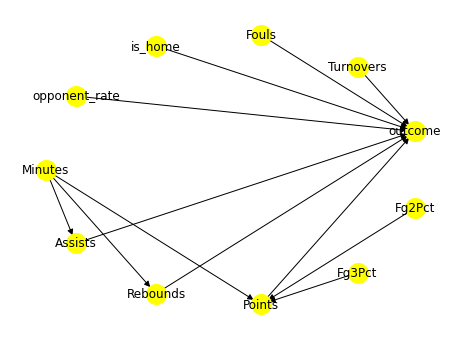

In [12]:
G = nx.DiGraph()
G.add_edges_from(
    [
        ("Minutes", "Assists"), 
        ("Minutes", "Rebounds"), 
        ("Minutes", "Points"), 
        ("Fg3Pct", "Points"),
        ("Fg2Pct", "Points"), 
        ("Points", "outcome"),
        ("Assists", "outcome"),
        ("Rebounds", "outcome"),
        ("Turnovers", "outcome"),
        ("Fouls", "outcome"),
        ("is_home", "outcome"),
        ('opponent_rate', 'outcome')
])
write_gml(G, 'testgml')
with open('testgml') as f: s = f.read()
model=CausalModel(
    data = curry_df,
    treatment="Assists",
    outcome="outcome",
    graph=s
    )
model.view_model()

In [13]:
# loop through some treatment, by seasons
curry_grouped = curry_df.groupby(['season'])
thompson_grouped = thompson_df.groupby(['season'])

In [14]:
def gen_estimate(gml_graph, input_df, treatment_col, outcome_col):
        # With graph
    model=CausalModel(
            data = input_df,
            treatment=treatment_col,
            outcome=outcome_col,
            graph=gml_graph
            )
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
#     print(identified_estimand)
    causal_estimate = model.estimate_effect(identified_estimand,
            method_name="backdoor.linear_regression")
    print(causal_estimate)
#     print('\n')
    return causal_estimate.value
#     print("Causal Estimate is " + str(causal_estimate.value))

In [15]:
treatment_columns = ['is_home']
estimates = []
for t in treatment_columns:
    for season, split_df in curry_grouped:
        print(season)
        try:
            est=gen_estimate(s,split_df,t,'outcome')
            estimates.append({'treatment_col':t, 'season':season, 'estimate':est, 'player':'Curry'})
        except:
            estimates.append({'treatment_col':t, 'season':season, 'estimate':None, 'player':'Curry'})
            
for t in treatment_columns:
    for season, split_df in thompson_grouped:
        print(season)
        try:
            est=gen_estimate(s,split_df,t,'outcome')
            print(est)
            estimates.append({'treatment_col':t, 'season':season, 'estimate':est, 'player':'Thompson'})
        except:
            estimates.append({'treatment_col':t, 'season':season, 'estimate':None, 'player':'Thompson'})
estimate_df=pd.DataFrame(estimates)

2011-12
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Fg3Pct', 'Assists', 'opponent_rate', 'Fouls', 'Fg2Pct', 'Points', 'Rebounds', 'Minutes', 'Turnovers']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                          
─────────(Expectation(outcome))
d[isₕₒₘₑ]                      
Estimand assumption 1, Unconfoundedness: If U→{is_home} and U→outcome then P(outcome|is_home,,U) = P(outcome|is_home,)

## Realized estimand
b: outcome~is_home+is_home*Fg3Pct+is_home*Assists+is_home*opponent_rate+is_home*Fouls+is_home*Fg2Pct+is_home*Points+is_home*Rebounds+is_home*Minutes+is_home*Turnovers
Target units: ate

## Estimate
Mean value: 0.04619656969182745
### Conditional Estimates
__categorical__Fg3Pct  __categorical__Assists  __cate

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                          
─────────(Expectation(outcome))
d[isₕₒₘₑ]                      
Estimand assumption 1, Unconfoundedness: If U→{is_home} and U→outcome then P(outcome|is_home,,U) = P(outcome|is_home,)

## Realized estimand
b: outcome~is_home+is_home*Fg3Pct+is_home*Assists+is_home*opponent_rate+is_home*Fouls+is_home*Fg2Pct+is_home*Points+is_home*Rebounds+is_home*Minutes+is_home*Turnovers
Target units: ate

## Estimate
Mean value: 0.2166455869413787
### Conditional Estimates
__categorical__Fg3Pct  __categorical__Assists  __categorical__opponent_rate  __categorical__Fouls  __categorical__Fg2Pct  __categorical__Points  __categorical__Rebounds  __categorical__Minutes  __categorical__Turnovers
(-0.001, 0.367]        (-0.001, 2.0]           (0.243, 0.366]                (-0.001, 1.0]         (-0.001, 0.5]          (-0.001, 17.8]         

In [16]:
estimate_df

,treatment_col,season,estimate,player
0,is_home,2011-12,0.046197,Curry
1,is_home,2012-13,0.205344,Curry
2,is_home,2013-14,-0.000143,Curry
3,is_home,2014-15,0.251735,Curry
4,is_home,2015-16,0.103540,Curry
5,is_home,2016-17,0.097614,Curry
6,is_home,2017-18,0.002271,Curry
7,is_home,2018-19,0.099150,Curry
8,is_home,2019-20,0.031467,Curry
9,is_home,2020-21,0.335987,Curry


In [17]:
# estimate_df.sort_values(by=['season','player'])

In [18]:
# test certain value comb as patterns
# curry > 23 points
def pattern_col_23_points(x):
    if x>23:
        return 1
    else:
        return 0
    
def pattern_col_15_points(x):
    if x<15:
        return 1
    else:
        return 0
curry_df["Points"] = curry_df["Points"].apply(lambda points: pattern_col_23_points(points))
curry_df["Points"].value_counts()
curry_grouped = curry_df.groupby(['season'])

In [19]:
estimates = []

for season, split_df in curry_grouped:
    print(season)
    try:
        est=gen_estimate(s,split_df,'Points','outcome')
        estimates.append({'treatment_col':'Points', 'season':season, 'estimate':est, 'player':'Curry'})
    except:
        estimates.append({'treatment_col':'Points', 'season':season, 'estimate':None, 'player':'Curry'})

numerical_pattern_estimate_df=pd.DataFrame(estimates)

2011-12
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['Fouls', 'is_home', 'Rebounds', 'Turnovers', 'Assists', 'opponent_rate']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                  
─────────(Expectation(outcome|Minutes))
d[Points]                              
Estimand assumption 1, Unconfoundedness: If U→{Points} and U→outcome then P(outcome|Points,Minutes,U) = P(outcome|Points,Minutes)

## Realized estimand
b: outcome~Points+Minutes+Points*Fouls+Points*is_home+Points*Rebounds+Points*Turnovers+Points*Assists+Points*opponent_rate
Target units: ate

## Estimate
Mean value: -0.6268047594928374
### Conditional Estimates
__categorical__Fouls  __categorical__is_home  __categorical__Rebounds  __categorical__Turnov

In [20]:
numerical_pattern_estimate_df.sort_values(by='estimate')

,treatment_col,season,estimate,player
0,Points,2011-12,-0.626805,Curry
2,Points,2013-14,-0.250967,Curry
1,Points,2012-13,-0.147753,Curry
10,Points,2021-22,-0.126638,Curry
3,Points,2014-15,0.057145,Curry
8,Points,2019-20,0.059519,Curry
7,Points,2018-19,0.075647,Curry
4,Points,2015-16,0.094746,Curry
5,Points,2016-17,0.125620,Curry
6,Points,2017-18,0.143525,Curry
